In [2]:
import pandas as pd
import matplotlib as plot

In [3]:
df = pd.read_csv('Player_stats.csv')

In [4]:
del df['Unnamed: 0']

In [5]:
df[['Player','Team','Year']][df[['Player','Team','Year']].duplicated()]

,Player,Team,Year
212,A.J. Green,Milwaukee Bucks,2023
214,Bobby Portis,Milwaukee Bucks,2023
216,Brook Lopez,Milwaukee Bucks,2023
218,Giannis Antetokounmpo,Milwaukee Bucks,2023
220,Goran Dragić,Milwaukee Bucks,2023
...,...,...,...
15683,Mitchell Robinson,New York Knicks,2023
15685,Obi Toppin,New York Knicks,2023
15687,Quentin Grimes,New York Knicks,2023
15689,RJ Barrett,New York Knicks,2023


In [6]:
df[['Player','Team','Year']].loc[(df['Player'] == 'Brook Lopez') & (df['Year'] == 2023)]

,Player,Team,Year
215,Brook Lopez,Milwaukee Bucks,2023
216,Brook Lopez,Milwaukee Bucks,2023


In [7]:
df=df[~df.duplicated()]

In [7]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [8]:
df[['Player','Team','Year','G','MP','PTS','AST','TRB','STL','BLK','TOV']]

,Player,Team,Year,G,MP,PTS,AST,TRB,STL,BLK,TOV
0,A.C. Green,Los Angeles Lakers,1991,82,26.4,9.1,0.9,6.3,0.7,0.3,1.2
1,Byron Scott,Los Angeles Lakers,1991,82,32.1,14.5,2.2,3.0,1.2,0.3,1.0
2,Elden Campbell,Los Angeles Lakers,1991,52,7.3,2.8,0.2,1.8,0.2,0.7,0.3
3,Irving Thomas,Los Angeles Lakers,1991,26,4.2,1.8,0.4,1.2,0.2,0.0,0.5
4,James Worthy,Los Angeles Lakers,1991,78,38.6,21.4,3.5,4.6,1.3,0.4,1.6
...,...,...,...,...,...,...,...,...,...,...,...
15807,Spencer Hawes,Milwaukee Bucks,2017,54,14.8,6.2,1.5,3.5,0.3,0.6,0.9
15808,Steve Novak,Milwaukee Bucks,2017,8,2.8,0.6,0.0,0.4,0.0,0.0,0.0
15809,Terrence Jones,Milwaukee Bucks,2017,54,23.5,10.8,1.1,5.7,0.7,1.0,0.9
15810,Thon Maker,Milwaukee Bucks,2017,57,9.9,4.0,0.4,2.0,0.2,0.5,0.3


## Who are the players with the best (Points , rebounds, blocks , Assists, steals, min per game)?

In [9]:
df['TPTS'] = df['G'] * df['PTS'] # Create Total points per season 
df['TAST'] = df['G'] * df['AST'] # Create Total assests per season 
df['TTRB'] = df['G'] * df['TRB'] # Create Total total rebounds per season 
df['TSTL'] = df['G'] * df['STL'] # Create Total steals per season 
df['TBLK'] = df['G'] * df['BLK'] # Create Total blocks per season 
df['TTOV'] = df['G'] * df['TOV'] # Create Total turnover per season 
df['TMP']  = df['G'] * df['MP']  # Create Total min  per season 

#### top 5 player with the highest points form 1991 to 2023

In [12]:
Total_stats_per_player =df[['Player','G','TMP','TPTS','TAST','TTRB','TSTL','TBLK','TTOV']].groupby('Player').sum()

In [13]:
Total_stats_per_player[['G','TPTS']].sort_values('TPTS', ascending=False).head(5)## Top 5 player scoring from 1991 to 2023

,G,TPTS
Player,,
LeBron James,1421,38648.2
Kobe Bryant,1346,33633.3
Dirk Nowitzki,1522,31561.1
Shaquille O'Neal,1207,28602.9
Carmelo Anthony,1260,28285.2


<Axes: xlabel='Player'>

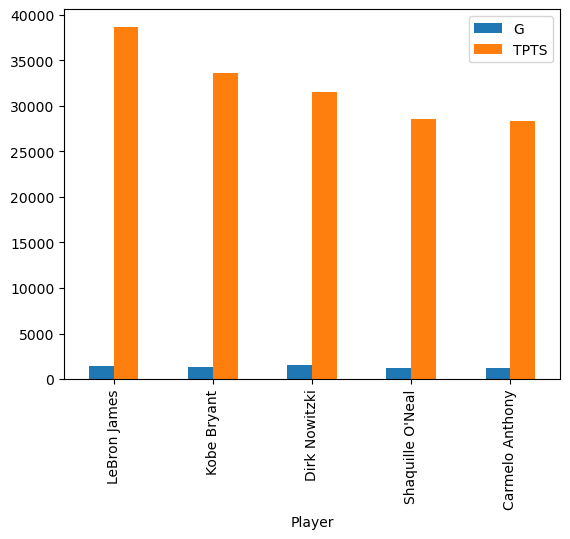

In [14]:
Total_stats_per_player[['G','TPTS']].sort_values('TPTS', ascending=False).head(5).plot.bar()

#### top 5 player with the highest Assists form 1991 to 2023

In [15]:
Total_stats_per_player[['G','TAST']].sort_values('TAST', ascending=False).head(5)## Top 5 player Assists from 1991 to 2023

,G,TAST
Player,,
Jason Kidd,1391,12114.0
Chris Paul,1214,11508.4
John Stockton,1016,10734.4
LeBron James,1421,10415.1
Steve Nash,1217,10337.1


<Axes: xlabel='Player'>

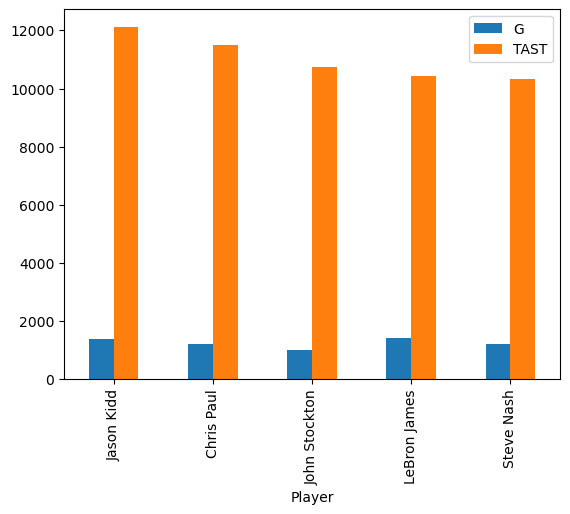

In [16]:
Total_stats_per_player[['G','TAST']].sort_values('TAST', ascending=False).head(5).head(5).plot.bar()

#### top 5 player with the highest rebounds form 1991 to 2023

In [17]:
Total_stats_per_player[['G','TTRB']].sort_values('TTRB', ascending=False).head(5)## Top 5 player rebounding from 1991 to 2023

,G,TTRB
Player,,
Tim Duncan,1392,15083.3
Kevin Garnett,1462,14649.4
Dwight Howard,1242,14622.7
Shaquille O'Neal,1207,13096.6
Dikembe Mutombo,1196,12350.6


<Axes: xlabel='Player'>

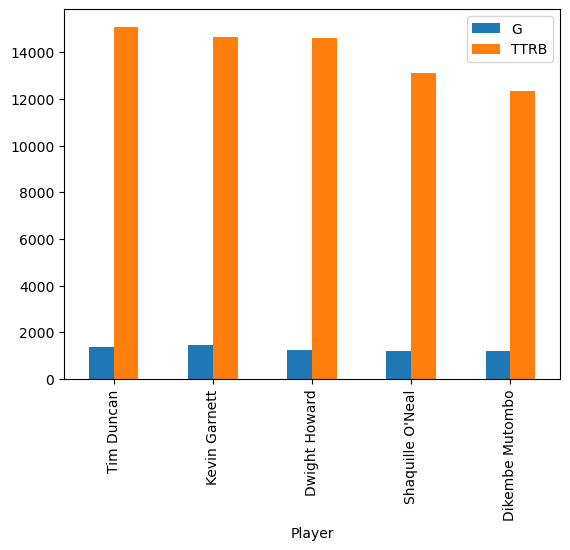

In [18]:
Total_stats_per_player[['G','TTRB']].sort_values('TTRB', ascending=False).head(5).plot.bar()

#### top 5 player with the highest steals form 1991 to 2023

In [19]:
Total_stats_per_player[['G','TSTL']].sort_values('TSTL', ascending=False).head(5)## Top 5 player stealing from 1991 to 2023

,G,TSTL
Player,,
Jason Kidd,1391,2692.6
Chris Paul,1214,2550.5
Gary Payton,1335,2460.3
LeBron James,1421,2188.6
John Stockton,1016,2113.0


<Axes: xlabel='Player'>

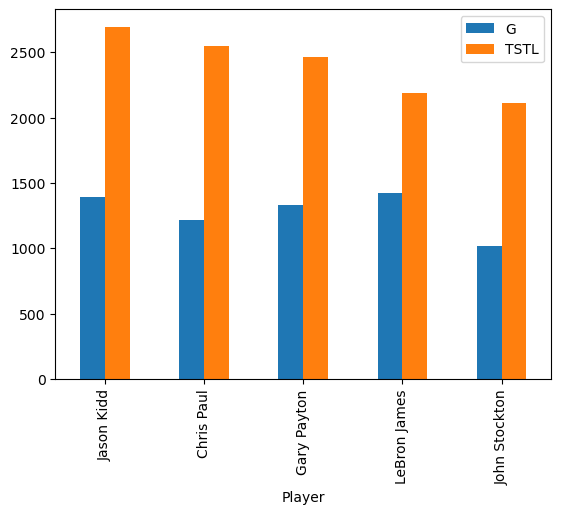

In [20]:
Total_stats_per_player[['G','TSTL']].sort_values('TSTL', ascending=False).head(5).plot.bar()

#### top 5 player with the highest blocks form 1991 to 2023

In [21]:
Total_stats_per_player[['G','TBLK']].sort_values('TBLK', ascending=False).head(5)## Top 5 player Block from 1991 to 2023

,G,TBLK
Player,,
Dikembe Mutombo,1196,3295.6
Tim Duncan,1392,3015.5
Shaquille O'Neal,1207,2727.9
David Robinson,905,2628.6
Alonzo Mourning,838,2355.8


<Axes: xlabel='Player'>

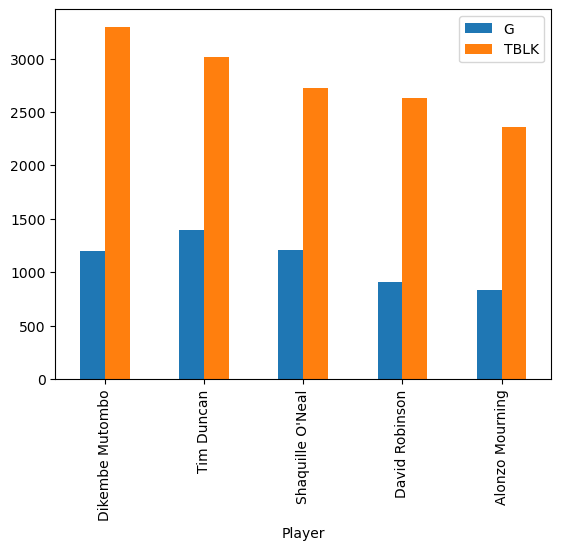

In [22]:
Total_stats_per_player[['G','TBLK']].sort_values('TBLK', ascending=False).head(5).plot.bar()

#### top 5 player with the highest turnovers form 1991 to 2023

In [23]:
Total_stats_per_player[['G','TTOV']].sort_values('TTOV', ascending=False).head(5)## Top 5 player turnover from 1991 to 2023

,G,TTOV
Player,,
LeBron James,1421,4965.4
Russell Westbrook,1094,4453.1
Kobe Bryant,1346,4016.0
Jason Kidd,1391,4000.8
James Harden,1000,3743.5


<Axes: xlabel='Player'>

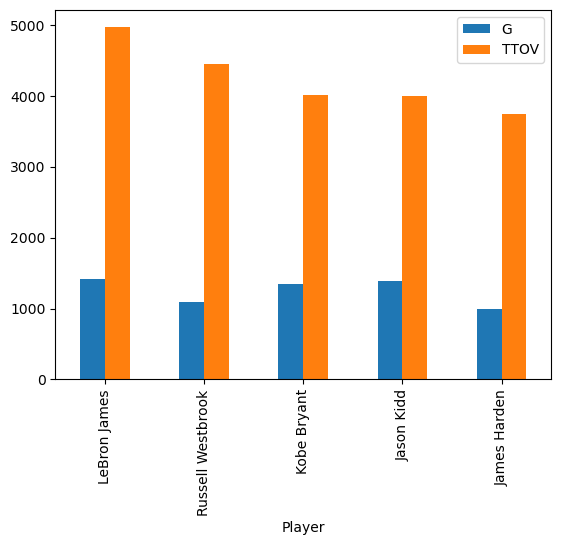

In [24]:
Total_stats_per_player[['G','TTOV']].sort_values('TTOV', ascending=False).head(5).plot.bar()

#### top 5 player with the highest minutes form 1991 to 2023

In [25]:
Total_stats_per_player[['G','TMP']].sort_values('TMP', ascending=False).head(5)## Top 5 player turnover from 1991 to 2023

,G,TMP
Player,,
LeBron James,1421,54093.8
Dirk Nowitzki,1522,51373.0
Kevin Garnett,1462,50425.1
Jason Kidd,1391,50120.6
Kobe Bryant,1346,48622.4


<Axes: xlabel='Player'>

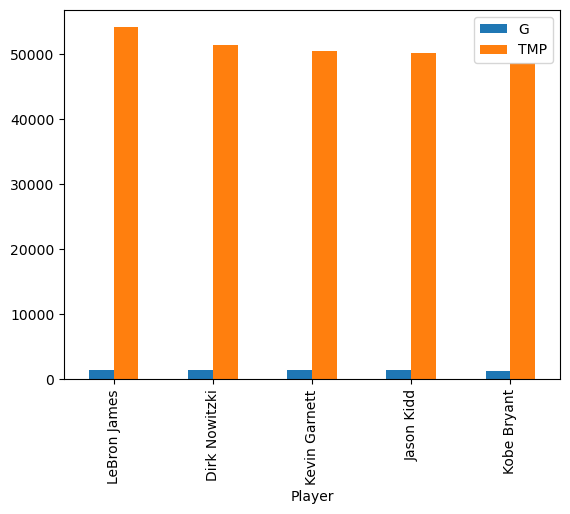

In [26]:
Total_stats_per_player[['G','TMP']].sort_values('TMP', ascending=False).head(5).plot.bar()

## Who are the players with the best season (Points , rebounds, blocks , Assists, steals, min per game)

#### top 5 player with the highest season points

In [27]:
highest_per_season= df[df['G'] > 70]

In [28]:
highest_per_season[['Player','Team','Year','PTS']].sort_values('PTS',ascending=False).head(5)

,Player,Team,Year,PTS
10797,James Harden,Houston Rockets,2019,36.1
1241,Kobe Bryant,Los Angeles Lakers,2006,35.4
5121,Allen Iverson,Philadelphia 76ers,2006,33.0
11116,Michael Jordan,Chicago Bulls,1993,32.6
7739,Tracy McGrady,Orlando Magic,2003,32.1


<Axes: xlabel='Player'>

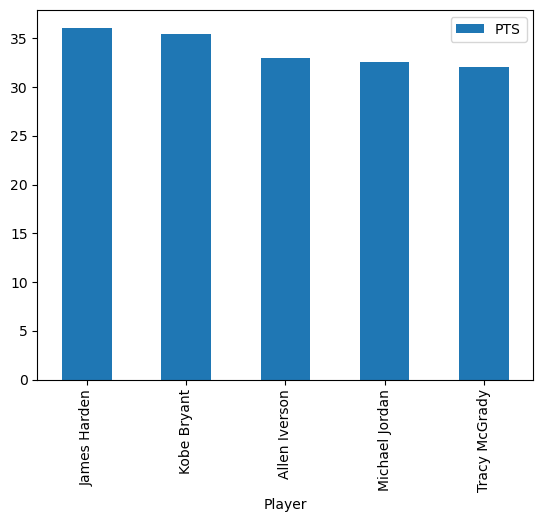

In [30]:
highest_per_season[['Player','Team','PTS']].sort_values('PTS',ascending=False).head(5).plot.bar('Player')

#### top 5 player with the highest season Assists

In [31]:
highest_per_season = df[df['G'] > 70].sort_values('AST',ascending=False).head(5)

In [32]:
highest_per_season[['Player','Team','Year','AST']]

,Player,Team,Year,AST
8180,John Stockton,Utah Jazz,1991,14.2
12041,John Stockton,Utah Jazz,1992,13.7
1428,John Stockton,Utah Jazz,1994,12.6
6,Magic Johnson,Los Angeles Lakers,1991,12.5
1885,John Stockton,Utah Jazz,1995,12.3


<Axes: xlabel='Player'>

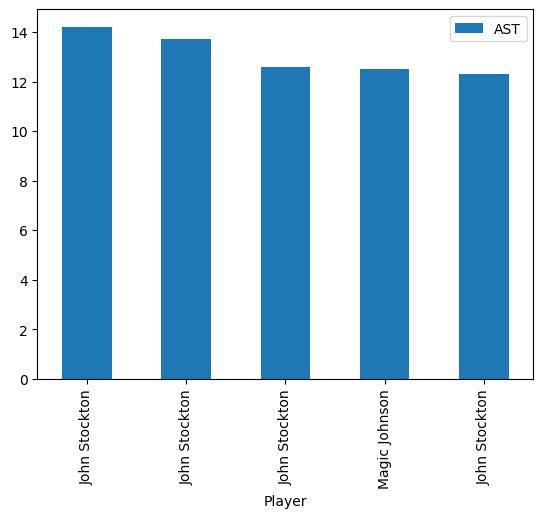

In [33]:
highest_per_season[['Player','Team','AST']].sort_values('AST',ascending=False).head(5).plot.bar('Player')

#### top 5 player with the highest season rebounds

In [34]:
highest_per_season = df[df['G'] > 70].sort_values('TRB',ascending=False).head(5)

In [35]:
highest_per_season[['Player','Team','Year','TRB']]

,Player,Team,Year,TRB
11731,Dennis Rodman,Detroit Pistons,1992,18.7
9774,Dennis Rodman,San Antonio Spurs,1994,17.3
6678,Andre Drummond,Detroit Pistons,2018,16.0
6697,Andre Drummond,Detroit Pistons,2019,15.6
4629,Kevin Willis,Atlanta Hawks,1992,15.5


<Axes: xlabel='Player'>

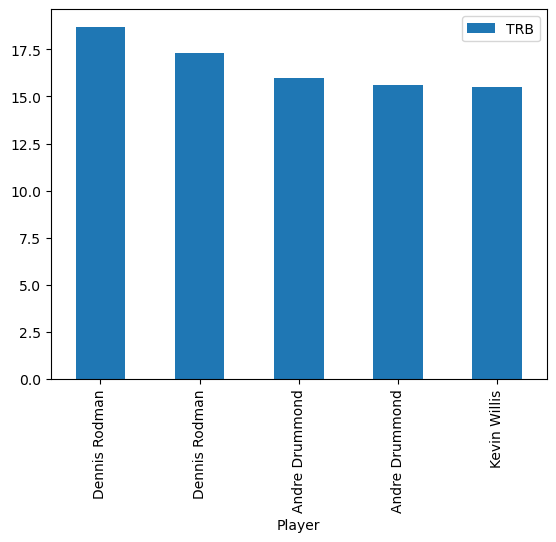

In [36]:
highest_per_season[['Player','Team','TRB']].sort_values('TRB',ascending=False).head(5).plot.bar('Player')

#### top 5 player with the highest season steals

In [37]:
highest_per_season = df[df['G'] > 70].sort_values('STL',ascending=False).head(5)

In [38]:
highest_per_season[['Player','Team','Year','STL']]

,Player,Team,Year,STL
2459,Alvin Robertson,Milwaukee Bucks,1991,3.0
12041,John Stockton,Utah Jazz,1992,3.0
5572,Nate McMillan,Seattle SuperSonics,1994,3.0
11150,Scottie Pippen,Chicago Bulls,1995,2.9
11135,Scottie Pippen,Chicago Bulls,1994,2.9


<Axes: xlabel='Player'>

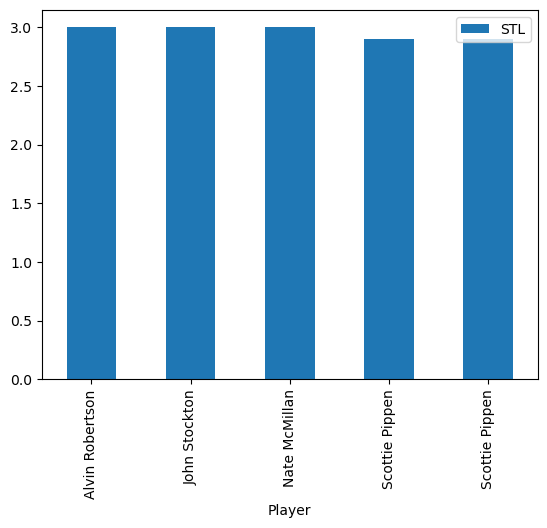

In [39]:
highest_per_season[['Player','Team','STL']].sort_values('STL',ascending=False).head(5).plot.bar('Player')

#### top 5 player with the highest season blocks

In [40]:
highest_per_season = df[df['G'] > 70].sort_values('BLK',ascending=False).head(5)

In [41]:
highest_per_season[['Player','Team','Year','BLK']]

,Player,Team,Year,BLK
10223,Dikembe Mutombo,Denver Nuggets,1996,4.5
14220,Hakeem Olajuwon,Houston Rockets,1993,4.2
2308,Dikembe Mutombo,Denver Nuggets,1994,4.1
10932,David Robinson,San Antonio Spurs,1991,3.9
11942,Dikembe Mutombo,Denver Nuggets,1995,3.9


<Axes: xlabel='Player'>

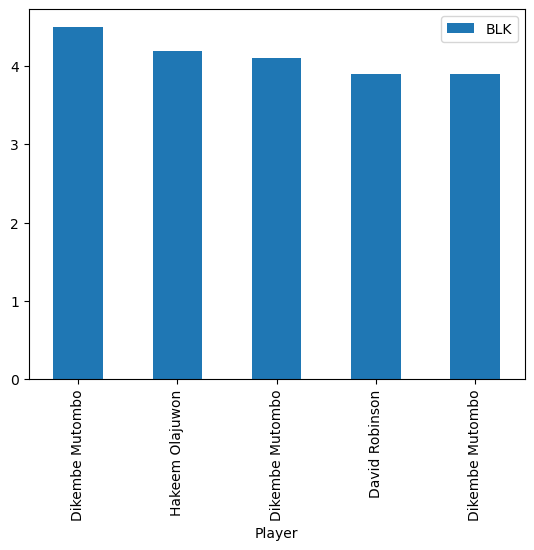

In [42]:
highest_per_season[['Player','Team','BLK']].sort_values('BLK',ascending=False).head(5).plot.bar('Player')

#### top 5 player with the highest season turnovers

In [43]:
highest_per_season = df[df['G'] > 70].sort_values('TOV',ascending=False).head(5)

In [44]:
highest_per_season[['Player','Team','Year','TOV']]

,Player,Team,Year,TOV
12288,James Harden,Houston Rockets,2017,5.7
7220,Russell Westbrook,Oklahoma City Thunder,2017,5.4
10797,James Harden,Houston Rockets,2019,5.0
7239,Russell Westbrook,Oklahoma City Thunder,2018,4.8
7809,James Harden,Houston Rockets,2016,4.6


<Axes: xlabel='Player'>

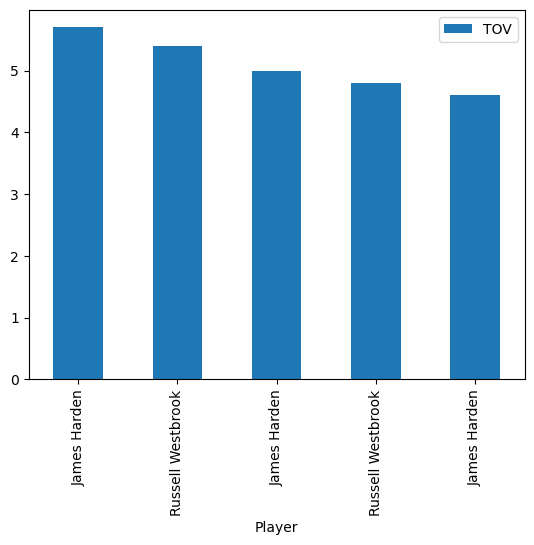

In [45]:
highest_per_season[['Player','Team','TOV']].sort_values('TOV',ascending=False).head(5).plot.bar('Player')

#### top 5 player with the highest season min

In [46]:
highest_per_season = df[df['G'] > 70].sort_values('MP',ascending=False).head(5)

In [47]:
highest_per_season[['Player','Team','Year','MP']]

,Player,Team,Year,MP
9334,Anthony Mason,Charlotte Hornets,1997,43.1
10969,Latrell Sprewell,Golden State Warriors,1994,43.1
5121,Allen Iverson,Philadelphia 76ers,2006,43.1
9337,Glen Rice,Charlotte Hornets,1997,42.6
3746,LeBron James,Cleveland Cavaliers,2006,42.5


<Axes: xlabel='Player'>

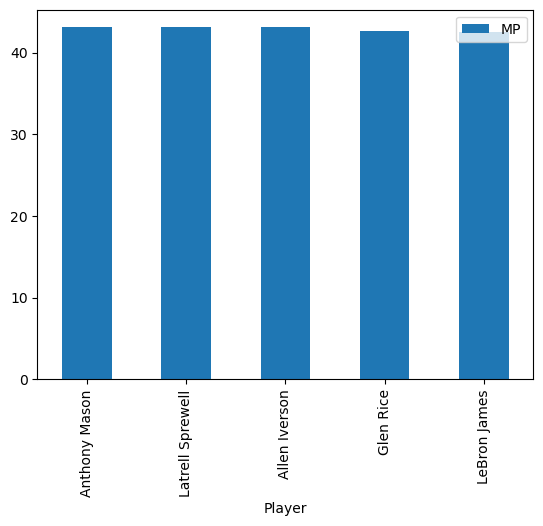

In [48]:
highest_per_season[['Player','Team','MP']].sort_values('MP',ascending=False).head(5).plot.bar('Player')

## What team with the most winning games and less losing games form 1991 to 2023? Why?

In [10]:
Team_stats= df[['Team','W','L','G','TPTS','TAST','TTRB','TSTL','TBLK','TTOV']]

In [11]:
best_team =Team_stats.groupby('Team').sum().sort_values('W',ascending=False).head(5)

In [12]:
best_team['TSTL'].max()

21707.2

#### top 5 team with the highest winning games

In [13]:
best_team

,W,L,G,TPTS,TAST,TTRB,TSTL,TBLK,TTOV
Team,,,,,,,,,
San Antonio Spurs,25249.0,12930.0,28384,267715.4,60963.1,114294.7,19592.2,14914.3,35925.0
Miami Heat,23208.0,19045.0,26423,266109.5,58406.5,111676.5,20380.4,13074.3,37731.7
Houston Rockets,22400.0,16640.0,26254,271140.7,58791.1,113504.0,21144.6,13302.2,38954.4
Boston Celtics,22130.0,19319.0,27218,269658.1,60060.5,111858.3,21707.2,12617.5,37654.6
Indiana Pacers,21906.0,19031.0,27676,270224.0,61362.4,114000.5,20531.1,13554.6,38393.8


In [18]:
ndf=best_team

In [27]:
ndf = ndf.reset_index()

<Axes: xlabel='Team'>

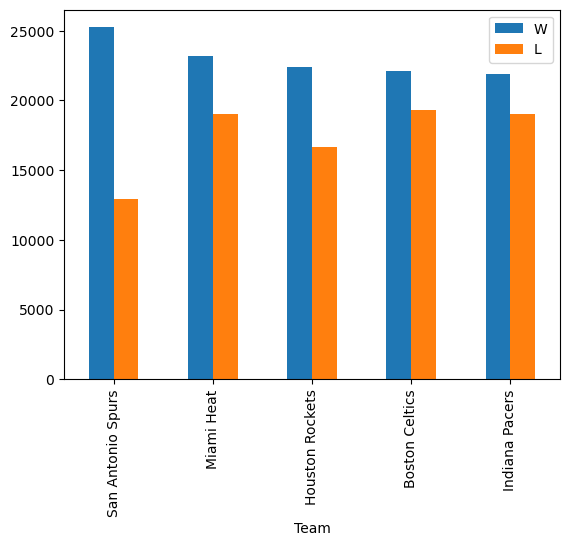

In [92]:
Team_stats[['Team','W','L']].groupby('Team').sum().sort_values('W',ascending=False).head(5).plot.bar()

### best winnig team Total points from 1991 to 2023

In [35]:
ndf[['Team','W','L','TPTS']].groupby('Team').sum().sort_values(['TPTS'],ascending=False).head(5)

,W,L,TPTS
Team,,,
Houston Rockets,22400.0,16640.0,271140.7
Indiana Pacers,21906.0,19031.0,270224.0
Boston Celtics,22130.0,19319.0,269658.1
San Antonio Spurs,25249.0,12930.0,267715.4
Miami Heat,23208.0,19045.0,266109.5


<Axes: xlabel='Team'>

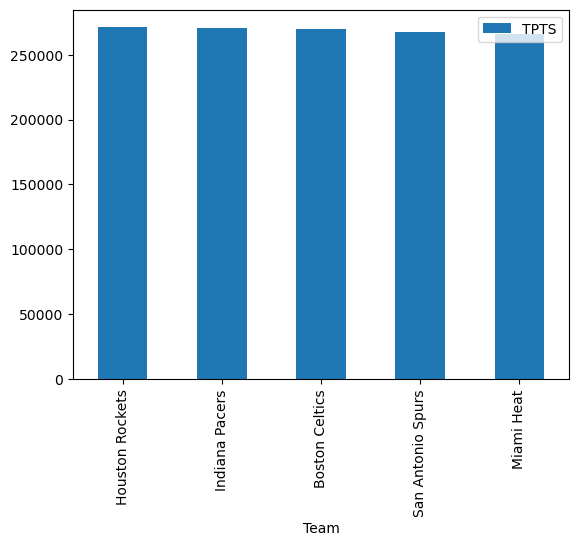

In [29]:
ndf[['Team','TPTS']].groupby('Team').sum().sort_values('TPTS',ascending=False).head(5).plot.bar()

#### best winnig team Total assists from 1991 to 2023

In [93]:
Team_stats[['Team','W','L','TAST']].groupby('Team').sum().sort_values(['W','TAST'],ascending=False).head(5)

,W,L,TAST
Team,,,
San Antonio Spurs,25249.0,12930.0,60963.1
Miami Heat,23208.0,19045.0,58406.5
Houston Rockets,22400.0,16640.0,58791.1
Boston Celtics,22130.0,19319.0,60060.5
Indiana Pacers,21906.0,19031.0,61362.4


<Axes: xlabel='Team'>

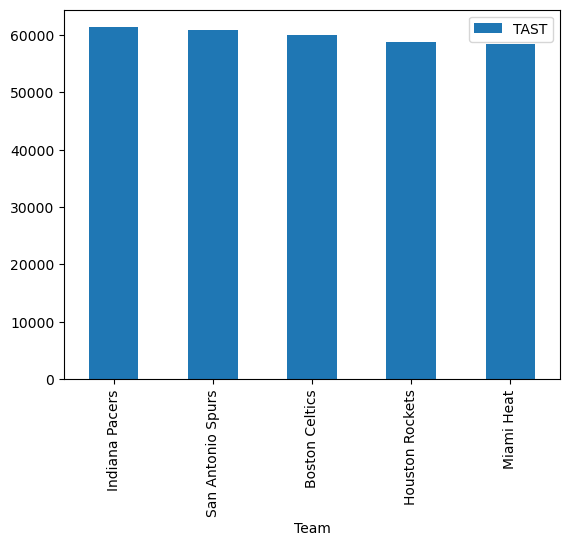

In [30]:
ndf[['Team','TAST']].groupby('Team').sum().sort_values('TAST',ascending=False).head(5).plot.bar()

#### best winnig team Total rebounds from 1991 to 2023

In [95]:
Team_stats[['Team','W','L','TTRB']].groupby('Team').sum().sort_values(['W','TTRB'],ascending=False).head(5)

,W,L,TTRB
Team,,,
San Antonio Spurs,25249.0,12930.0,114294.7
Miami Heat,23208.0,19045.0,111676.5
Houston Rockets,22400.0,16640.0,113504.0
Boston Celtics,22130.0,19319.0,111858.3
Indiana Pacers,21906.0,19031.0,114000.5


<Axes: xlabel='Team'>

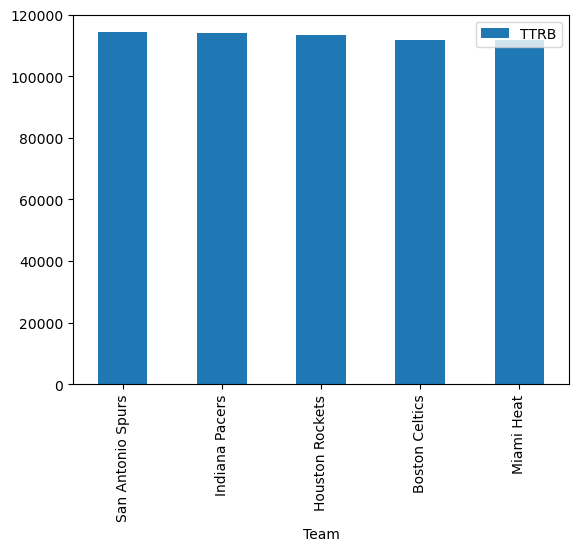

In [31]:
ndf[['Team','TTRB']].groupby('Team').sum().sort_values('TTRB',ascending=False).head(5).plot.bar()

#### best winnig team Total steals from 1991 to 2023 

In [97]:
Team_stats[['Team','W','L','TSTL']].groupby('Team').sum().sort_values(['W','TSTL'],ascending=False).head(5)

,W,L,TSTL
Team,,,
San Antonio Spurs,25249.0,12930.0,19592.2
Miami Heat,23208.0,19045.0,20380.4
Houston Rockets,22400.0,16640.0,21144.6
Boston Celtics,22130.0,19319.0,21707.2
Indiana Pacers,21906.0,19031.0,20531.1


<Axes: xlabel='Team'>

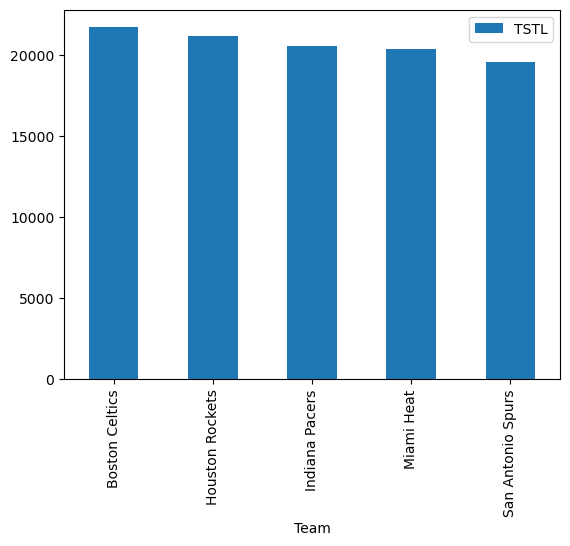

In [32]:
ndf[['Team','TSTL']].groupby('Team').sum().sort_values('TSTL',ascending=False).head(5).plot.bar()

#### best winnig team Total blocks from 1991 to 2023  

In [99]:
Team_stats[['Team','W','L','TBLK']].groupby('Team').sum().sort_values(['W','TBLK'],ascending=False).head(5)

,W,L,TBLK
Team,,,
San Antonio Spurs,25249.0,12930.0,14914.3
Miami Heat,23208.0,19045.0,13074.3
Houston Rockets,22400.0,16640.0,13302.2
Boston Celtics,22130.0,19319.0,12617.5
Indiana Pacers,21906.0,19031.0,13554.6


<Axes: xlabel='Team'>

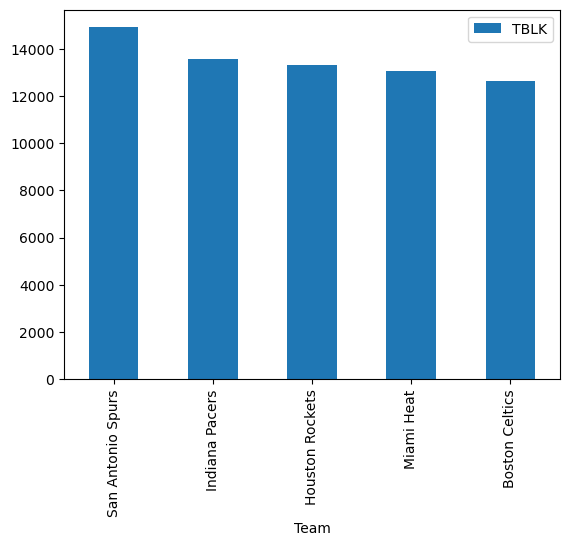

In [33]:
ndf[['Team','TBLK']].groupby('Team').sum().sort_values('TBLK',ascending=False).head(5).plot.bar()

#### best winnig team Total turnovers from 1991 to 2023   

In [37]:
Team_stats[['Team','W','L','TTOV']].groupby('Team').sum().sort_values(['W','TTOV'],ascending=False).head(5)

,W,L,TTOV
Team,,,
San Antonio Spurs,25249.0,12930.0,35925.0
Miami Heat,23208.0,19045.0,37731.7
Houston Rockets,22400.0,16640.0,38954.4
Boston Celtics,22130.0,19319.0,37654.6
Indiana Pacers,21906.0,19031.0,38393.8


<Axes: xlabel='Team'>

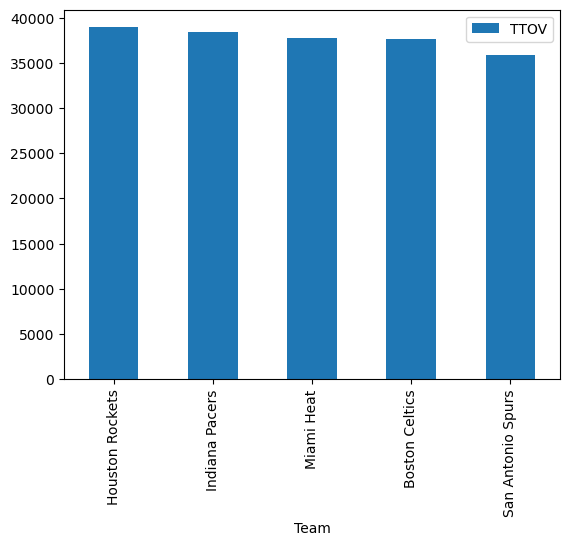

In [34]:
ndf[['Team','TTOV']].groupby('Team').sum().sort_values('TTOV',ascending=False).head(5).plot.bar()